This script plots slab boundary layer model quasi-steady-state BL zonal and meridional momentum budgets.

Author: Alex Gonzalez (agon@iastate.edu). Sep 2021.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# latitude range and resolution for sblm model grid
res_sblm = 0.25
latS = -30
latN = 30

Two = 2.
Om = 7.292e-5
Rd = 287 
Rv = 461
aearth = 6.371e6 # radius of Earth

capk = 1000000

In [290]:
mainfolder = '/Users/alex.gonzalez/Google Drive/My Drive/ITCZ_sblm_1D/ERA5/'
# output directory

figfolder = mainfolder+'figures/'

# input directories
dri = mainfolder+'/progs/control/'

ishconst = True

mon_str = 'Mar'
fni = 'Tv_allmon.nc'   # file name

data = xr.open_dataset(dri+fni, decode_times=False, engine='netcdf4')

In [5]:
data

<xarray.Dataset>
Dimensions:   (t_out: 721, phi_out: 241, traj_id: 73, month: 12)
Coordinates:
  * t_out     (t_out) float64 0.0 3.6e+03 7.2e+03 ... 7.92e+04 8.28e+04 0.0
  * phi_out   (phi_out) float64 -0.5236 -0.5192 -0.5149 ... 0.5149 0.5192 0.5236
  * traj_id   (traj_id) float64 1.0 2.0 3.0 4.0 5.0 ... 69.0 70.0 71.0 72.0 73.0
  * month     (month) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Data variables:
    u0        (month, phi_out) float64 ...
    v0        (month, phi_out) float64 ...
    pgf       (month, phi_out) float64 ...
    pgfx      (month, phi_out) float64 ...
    u         (t_out, month, phi_out) float64 ...
    v         (t_out, month, phi_out) float64 ...
    w         (t_out, month, phi_out) float64 ...
    phi_traj  (t_out, month, traj_id) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    title:        output from the zonally symmetric, spherical version of the...
    model:        SBLM_s (solver library version 1.2 (2019 Nov))
    experiment:   test01
    precision:    double precision
    date:         2023-10-04
    time:         16:21:04.272
    history:      Thu Oct 05 10:47:17 2023: cdo -setattribute,month@long_name...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

In [38]:
ui = data['u'][0,:,:]#.sel(t_out=0)
vi = data['v'][0,:,:]#.sel(t_out=0)
wi = data['w'][0,:,:]#.sel(t_out=0)
print(wi.max()*1000)

<xarray.DataArray 'w' ()>
array(-0.)
Coordinates:
    t_out    float64 0.0


In [7]:
[nphi] = ui.shape
nphi = nphi-1

In [39]:
wi

<xarray.DataArray 'w' (month: 12, phi_out: 241)>
array([[ 0.,  0.,  0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -0., -0., -0.]])
Coordinates:
    t_out    float64 0.0
  * phi_out  (phi_out) float64 -0.5236 -0.5192 -0.5149 ... 0.5149 0.5192 0.5236
  * month    (month) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Attributes:
    long_name:  vertical wind at top of boundary layer
    units:      m/s

In [40]:
nt = int(len(data['t_out'].values)/1)
print(nt-1)
uf = data['u'].isel(t_out=nt-1)
vf = data['v'].isel(t_out=nt-1)
wf = data['w'].isel(t_out=nt-1)

print(wf.max()*1000)

720
<xarray.DataArray 'w' ()>
array(10.66825154)
Coordinates:
    t_out    float64 0.0


In [41]:
wf

<xarray.DataArray 'w' (month: 12, phi_out: 241)>
array([[0.001989, 0.00187 , 0.001536, ..., 0.000585, 0.000829, 0.000909],
       [0.00204 , 0.00192 , 0.001581, ..., 0.000671, 0.000862, 0.000921],
       [0.001947, 0.001842, 0.001541, ..., 0.00085 , 0.000999, 0.001044],
       ...,
       [0.002394, 0.002286, 0.001974, ..., 0.000763, 0.000965, 0.001031],
       [0.002195, 0.002075, 0.001734, ..., 0.000824, 0.001083, 0.001169],
       [0.002032, 0.001918, 0.001592, ..., 0.000753, 0.001022, 0.001111]])
Coordinates:
    t_out    float64 0.0
  * phi_out  (phi_out) float64 -0.5236 -0.5192 -0.5149 ... 0.5149 0.5192 0.5236
  * month    (month) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
Attributes:
    long_name:  vertical wind at top of boundary layer
    units:      m/s

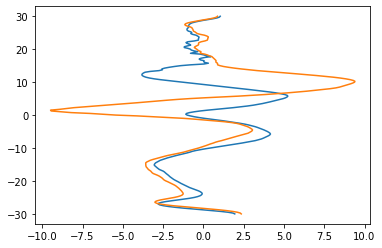

In [84]:
plt.plot(wf[2,:]*1000,phi*180/np.pi)
plt.plot(wf[8,:]*1000,phi*180/np.pi)

In [86]:
# output directories
dro = mainfolder+'/progs/data_preproc/monthly/'
    
fno = 'h_forcing2.nc'

datah = xr.open_dataset(dro+fno, decode_times=False)

hvar = datah['h'].values#*0 + 700
hvar.shape

(12, 241)

In [13]:
#plt.plot(hvar,hvar['latitude'])

In [292]:
def center_fd(fieldi,x):
    [nx,nmon,nlat] = fieldi.shape
    field = fieldi.transpose()
    #print(field.shape)
    dfdx = np.zeros((nlat,nmon,nx))
    dfdx[:,:,1:nx-1] = (field[:,:,2:nx] - field[:,:,0:nx-2])/(x[2:nx] - x[0:nx-2])
    dfdx[:,:,0]      = (field[:,:,1] - field[:,:,0])/(x[1] - x[0])
    dfdx[:,:,nx-1]   = (field[:,:,nx-1] - field[:,:,nx-2])/(x[nx-1] - x[nx-2])
    
    fieldf = dfdx.transpose()
    #print(fieldf.shape)
    return fieldf

phi = ui['phi_out'].values
dphi = np.abs(phi[1]-phi[0])
lat_sblm = phi*180/np.pi

In [293]:
adphi = aearth*(data['phi_out'].values.max()-data['phi_out'].values.min())/len(data['phi_out'])
adphi2 = adphi*adphi
cosa = np.cos(phi)*aearth

In [294]:
nmon = 12

In [295]:
u_ty = data['u'].values
v_ty = data['v'].values
dudt = center_fd(u_ty,data['t_out'].values)
dvdt = center_fd(v_ty,data['t_out'].values)

In [296]:
dvdt.shape

(721, 12, 241)

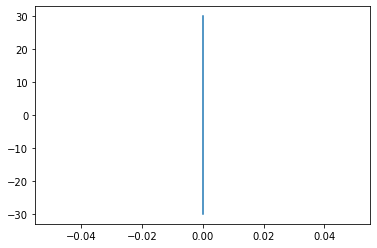

In [297]:
plt.plot(dvdt[nt-1,2,:],phi*180/np.pi)

In [298]:
nt = 721

In [299]:
du = np.zeros((nt,nmon,nphi+1))
d2u = np.zeros((nt,nmon,nphi+1))
udiff = np.zeros((nt,nmon,nphi+1))
dlhadphi = np.zeros((nt,nmon,nphi+1))

In [300]:
def center_fd_monlat(fieldi,x):
    [nmon,nx] = fieldi.shape
    field = fieldi
    #print(field.shape)
    dfdx = np.zeros((nmon,nx))
    dfdx[:,1:nx-1] = (field[:,2:nx] - field[:,0:nx-2])/(x[2:nx] - x[0:nx-2])
    dfdx[:,0]      = (field[:,1] - field[:,0])/(x[1] - x[0])
    dfdx[:,nx-1]   = (field[:,nx-1] - field[:,nx-2])/(x[nx-1] - x[nx-2])
    
    fieldf = dfdx
    #print(fieldf.shape)
    return fieldf


In [301]:
def center_fd_d_dy(fieldi,x):
    [nx,nmon,nlat] = fieldi.shape
    field = fieldi#.transpose()
    print(nlat)
    print(field[:,:,2:nlat].shape)
    dfdx = field*0
    dfdx[:,:,1:nlat-1] = (field[:,:,2:nlat] - field[:,:,0:nlat-2])/(x[2:nlat] - x[0:nlat-2])
    dfdx[:,:,0]      = (field[:,:,1] - field[:,:,0])/(x[1] - x[0])
    dfdx[:,:,nlat-1]   = (field[:,:,nlat-1] - field[:,:,nlat-2])/(x[nlat-1] - x[nlat-2])
    
    fieldf = dfdx#.transpose()
    #print(fieldf.shape)

    return fieldf

In [302]:
data['u'].values.shape

(721, 12, 241)

In [303]:
data['w'][nt-1,2,:]

<xarray.DataArray 'w' (phi_out: 241)>
array([0.001947, 0.001842, 0.001541, ..., 0.00085 , 0.000999, 0.001044])
Coordinates:
    t_out    float64 0.0
  * phi_out  (phi_out) float64 -0.5236 -0.5192 -0.5149 ... 0.5149 0.5192 0.5236
    month    float64 0.0
Attributes:
    long_name:  vertical wind at top of boundary layer
    units:      m/s

In [304]:
vdudy = -data['v']*center_fd_d_dy(data['u'].values,phi)/aearth
wf_neg = np.where(data['w']<0,data['w'],0)
u_ft_ex = (data['u']-data['u0'])*wf_neg/hvar #* 0
uCor = (Two*Om*np.sin(phi) + data['u']*np.tan(phi)/aearth)*data['v']
U = 0.78*np.sqrt(data['u']*data['u']+data['v']*data['v'])
cDU = (2.7 + 0.142*U + 0.0764*U*U)/1000.
udrag = -cDU*data['u']/hvar

241
(721, 12, 239)


In [305]:
data['v'].shape

(721, 12, 241)

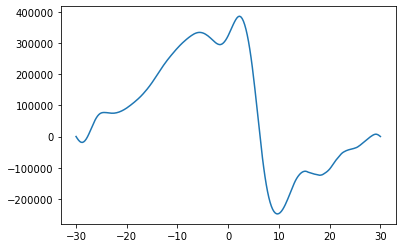

In [306]:
plt.plot(lat_sblm,data['v'][nt-1,0,:]*86400)

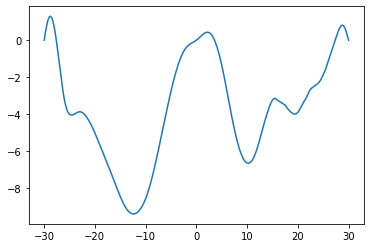

In [307]:
plt.plot(lat_sblm,uCor[nt-1,2,:]*86400)

In [308]:
# first derivative for u
du[:,:,1:nphi] = data['u'][:,:,2:nphi+1].values - data['u'][:,:,:nphi-1].values

# second derivative for u
d2u[:,:,1:nphi] = data['u'][:,:,2:nphi+1].values - Two*data['u'][:,:,1:nphi].values + data['u'][:,:,:nphi-1].values

dlhadphi[:,:,1:nphi] = np.log(hvar[:,2:nphi+1]/hvar[:,:nphi-1])/(Two*adphi)

In [309]:
udiff[:,:,1:nphi] = capk*( d2u[:,:,1:nphi]/adphi2 \
                        - du[:,:,1:nphi]/(Two*adphi)*np.tan(phi[1:nphi])/aearth \
                        - data['u'][:,:,1:nphi]/(cosa[1:nphi]*cosa[1:nphi]) \
                        + dlhadphi[:,:,1:nphi]*(du[:,:,1:nphi]/(Two*adphi) - data['u'][:,:,1:nphi]*np.tan(phi[1:nphi])/aearth) )

In [310]:
uresid = vdudy + uCor + u_ft_ex + udrag + udiff

In [311]:
dv = np.zeros((nt,nmon,nphi+1))
d2v = np.zeros((nt,nmon,nphi+1))
vdiff = np.zeros((nt,nmon,nphi+1))

In [320]:
vdvdy = -data['v']*center_fd_d_dy( data['v'].values,phi)/aearth
v_ft_ex = (data['v']-data['v0'])*wf_neg/hvar #* 0
vCor = -(Two*Om*np.sin(phi) + data['u']*np.tan(phi)/aearth)*data['u']
vdrag = -cDU*data['v']/hvar

241
(721, 12, 239)


In [321]:
# first derivative for v
dv[:,:,1:nphi] = data['v'][:,:,2:nphi+1].values - data['v'][:,:,:nphi-1].values

# second derivative for v
d2v[:,:,1:nphi] = data['v'][:,:,2:nphi+1].values - Two*data['v'][:,:,1:nphi].values + data['v'][:,:,:nphi-1].values

In [322]:
vdiff[:,:,1:nphi] = capk*( d2v[:,:,1:nphi]/adphi2 \
                        - dv[:,:,1:nphi]/(Two*adphi)*np.tan(phi[1:nphi])/aearth \
                        - data['v'][:,:,1:nphi]/(cosa[1:nphi]*cosa[1:nphi]) \
                        + dlhadphi[:,:,1:nphi]*(dv[:,:,1:nphi]/(Two*adphi) - data['v'][:,:,1:nphi]*np.tan(phi[1:nphi])/aearth) )

#vdiff[0] = 0
#vdiff[nphi] = 0

In [323]:
vresid = vdvdy + vCor + -data['pgf'] + v_ft_ex + vdrag + vdiff

In [324]:
print(dvdt.shape)
print(nt-1)
print(nt-1-50)
print(nt-1-100)

(721, 12, 241)
720
670
620


In [325]:
u_budget_terms = np.array([r'$-v(\partial u/\partial y)$',r'$w(1-\alpha)(u-u_{FT})/h$',r'$f_ev$',r'$-c_DUu/h$',r'$K_u$'])
v_budget_terms = np.array([r'$-v(\partial v/\partial y)$',r'$w(1-\alpha)(v-v_{FT})/h$',r'$-f_eu$',r'$- R_dT_v(\partial \ln p/\partial y)$',r'$-c_DUv/h$',r'$K_v$'])

#locu = 2
#locv = 2

locu = 1
locv = 4

In [326]:
nt

721

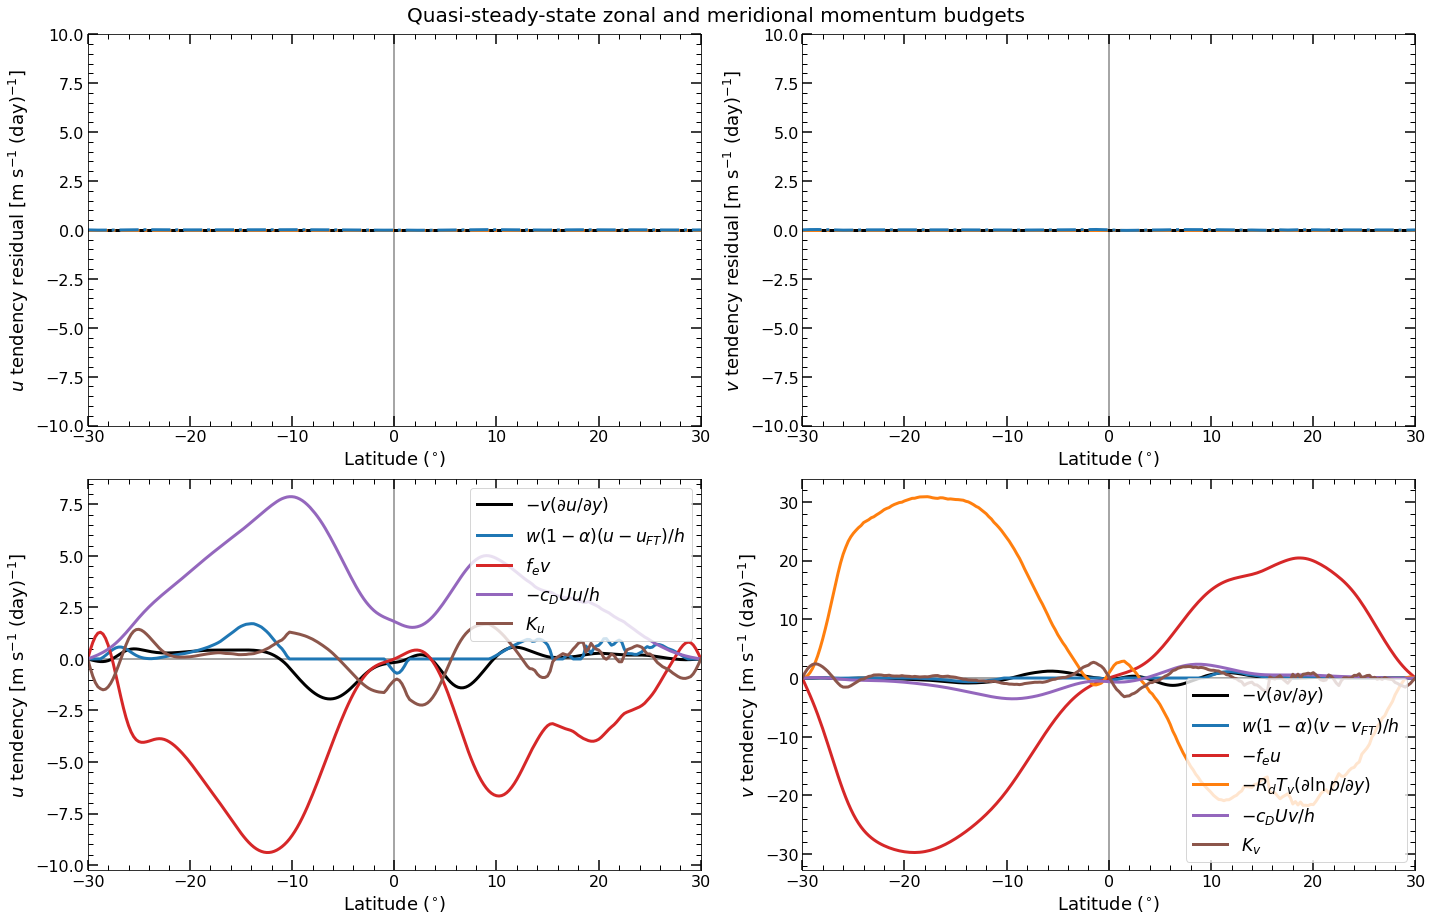

In [327]:
mon = 2
#plt.rcParams['text.usetex'] = True
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(20, 13), tight_layout='true')
fig.suptitle('Quasi-steady-state zonal and meridional momentum budgets', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(2,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_xlabel('Latitude ($^{\circ}$)', fontsize=18)
   plt.xlim(-30,30)
   if jj == 0: 
      ax1.set_ylabel(r'$u$ tendency residual [m s$^{-1}$ (day)$^{-1}$]', fontsize=18)
      #lns1 = ax1.plot(lat_sblm,vresid*86400, linewidth='3', color = 'k', label = 'gcm')
      lns1 = ax1.plot(lat_sblm,dudt[nt-1-100,mon,:]*86400, linewidth='3', color = 'k', label = 'gcm')
      lns2 = ax1.plot(lat_sblm,dudt[nt-1-50,mon,:]*86400, linewidth='3', linestyle='-.', color = 'tab:orange', label = 'ekman')
      lns3 = ax1.plot(lat_sblm,uresid[nt-1-50,mon,:]*86400, linewidth='3', linestyle='-.', color = 'tab:blue', label = 'ekman')
      plt.ylim(-10,10)
   if jj == 1: 
      ax1.set_ylabel(r'$v$ tendency residual [m s$^{-1}$ (day)$^{-1}$]', fontsize=18)
      #lns1 = ax1.plot(lat_sblm,vresid*86400, linewidth='3', color = 'k', label = 'gcm')
      lns1 = ax1.plot(lat_sblm,dvdt[nt-1-100,mon,:]*86400, linewidth='3', color = 'k', label = 'gcm')
      lns2 = ax1.plot(lat_sblm,dvdt[nt-1-50,mon,:]*86400, linewidth='3', linestyle='-.', color = 'tab:orange', label = 'ekman')
      lns3 = ax1.plot(lat_sblm,vresid[nt-1-50,mon,:]*86400, linewidth='3', linestyle='-.', color = 'tab:blue', label = 'ekman')
      plt.ylim(-10,10)   
   if jj == 2: 
      ax1.set_ylabel('$u$ tendency [m s$^{-1}$ (day)$^{-1}$]', fontsize=18)
      lns1 = ax1.plot(lat_sblm,vdudy[nt-1,mon,:]*86400, linewidth='3', color = 'k', label = u_budget_terms[0])
      lns2 = ax1.plot(lat_sblm,u_ft_ex[nt-1,mon,:]*86400, linewidth='3', color = 'tab:blue', label = u_budget_terms[1])
      lns3 = ax1.plot(lat_sblm,uCor[nt-1,mon,:]*86400, linewidth='3', color = 'tab:red',label = u_budget_terms[2])
      #lns4 = ax1.plot(lat_sblm,-data['pgf']*86400, linewidth='3', color = 'tab:orange', label = 'gcm')
      lns5 = ax1.plot(lat_sblm,udrag[nt-1,mon,:]*86400, linewidth='3', color = 'tab:purple',label = u_budget_terms[3])
      lns6 = ax1.plot(lat_sblm,udiff[nt-1,mon,:]*86400, linewidth='3', color = 'tab:brown', label = u_budget_terms[4])
      ax1.legend(loc=locu, fontsize='xx-large')
   if jj == 3: 
      ax1.set_ylabel('$v$ tendency [m s$^{-1}$ (day)$^{-1}$]', fontsize=18)
      lns1 = ax1.plot(lat_sblm,vdvdy[nt-1,mon,:]*86400, linewidth='3', color = 'k', label = v_budget_terms[0])
      lns2 = ax1.plot(lat_sblm,v_ft_ex[nt-1,mon,:]*86400, linewidth='3', color = 'tab:blue', label = v_budget_terms[1])
      lns3 = ax1.plot(lat_sblm,vCor[nt-1,mon,:]*86400, linewidth='3', color = 'tab:red', label = v_budget_terms[2])
      lns4 = ax1.plot(lat_sblm,-data['pgf'][mon,:]*86400, linewidth='3', color = 'tab:orange', label = v_budget_terms[3])
      lns5 = ax1.plot(lat_sblm,vdrag[nt-1,mon,:]*86400, linewidth='3', color = 'tab:purple', label = v_budget_terms[4])
      lns6 = ax1.plot(lat_sblm,vdiff[nt-1,mon,:]*86400, linewidth='3', color = 'tab:brown', label = v_budget_terms[5])
      ax1.legend(loc=locv, fontsize='xx-large')
   #if jj == 3: 
      # add these two lines
      #lns = lns1+lns2+lns3
      #labs = [l.get_label() for l in lns]
      #ax1.legend(lns, labs, loc=4,fontsize=14)
                    
   plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
#plt.savefig(figfolder+"sblm_uvwrvo_curves_ekm.pdf", dpi=150)

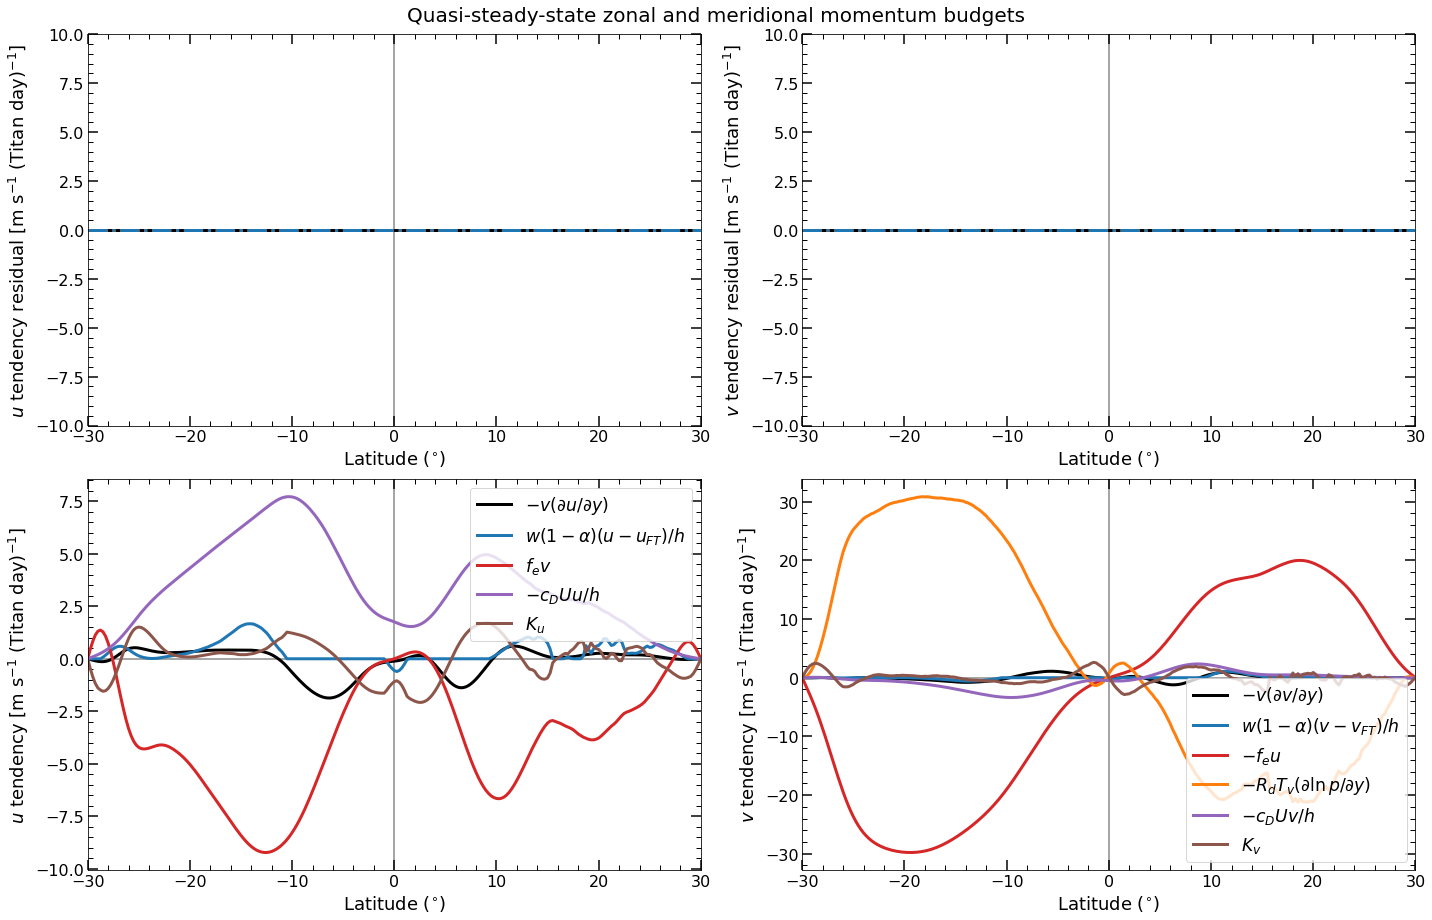

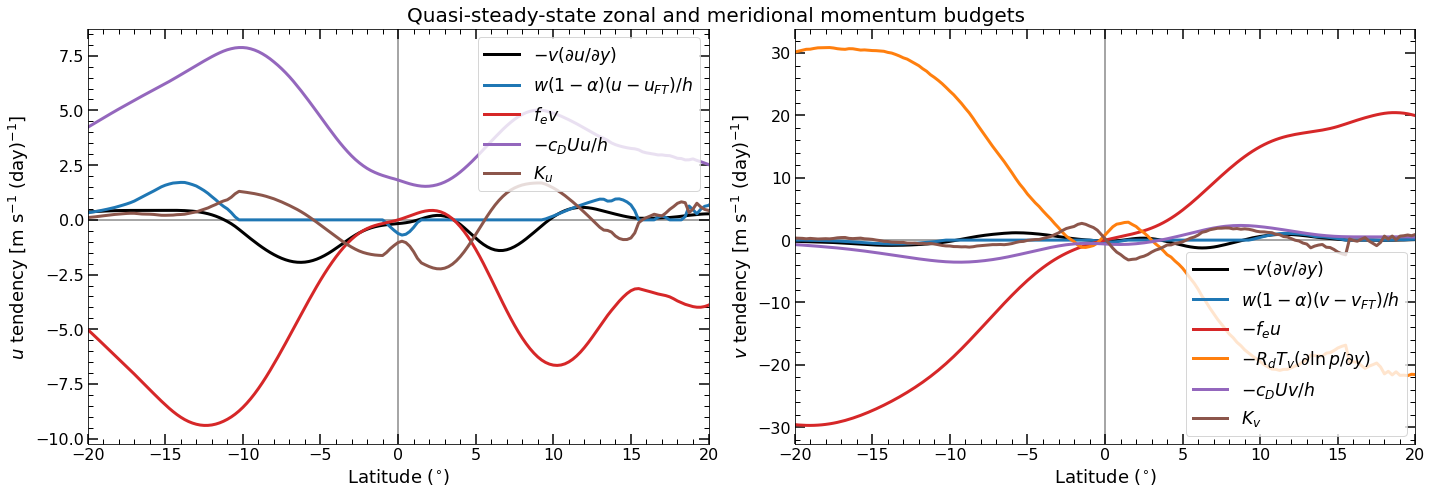

In [329]:
mon = 2
#plt.rcParams['text.usetex'] = True
npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(20, 13), tight_layout='true')
fig.suptitle('Quasi-steady-state zonal and meridional momentum budgets', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(2,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_xlabel('Latitude ($^{\circ}$)', fontsize=18)
   plt.xlim(-20,20)

   if jj == 0: 
      ax1.set_ylabel('$u$ tendency [m s$^{-1}$ (day)$^{-1}$]', fontsize=18)
      lns1 = ax1.plot(lat_sblm,vdudy[nt-1,mon,:]*86400, linewidth='3', color = 'k', label = u_budget_terms[0])
      lns2 = ax1.plot(lat_sblm,u_ft_ex[nt-1,mon,:]*86400, linewidth='3', color = 'tab:blue', label = u_budget_terms[1])
      lns3 = ax1.plot(lat_sblm,uCor[nt-1,mon,:]*86400, linewidth='3', color = 'tab:red',label = u_budget_terms[2])
      #lns4 = ax1.plot(lat_sblm,-data['pgf']*86400, linewidth='3', color = 'tab:orange', label = 'gcm')
      lns5 = ax1.plot(lat_sblm,udrag[nt-1,mon,:]*86400, linewidth='3', color = 'tab:purple',label = u_budget_terms[3])
      lns6 = ax1.plot(lat_sblm,udiff[nt-1,mon,:]*86400, linewidth='3', color = 'tab:brown', label = u_budget_terms[4])
      ax1.legend(loc=locu, fontsize='xx-large')
   if jj == 1: 
      ax1.set_ylabel('$v$ tendency [m s$^{-1}$ (day)$^{-1}$]', fontsize=18)
      lns1 = ax1.plot(lat_sblm,vdvdy[nt-1,mon,:]*86400, linewidth='3', color = 'k', label = v_budget_terms[0])
      lns2 = ax1.plot(lat_sblm,v_ft_ex[nt-1,mon,:]*86400, linewidth='3', color = 'tab:blue', label = v_budget_terms[1])
      lns3 = ax1.plot(lat_sblm,vCor[nt-1,mon,:]*86400, linewidth='3', color = 'tab:red', label = v_budget_terms[2])
      lns4 = ax1.plot(lat_sblm,-data['pgf'][mon,:]*86400, linewidth='3', color = 'tab:orange', label = v_budget_terms[3])
      lns5 = ax1.plot(lat_sblm,vdrag[nt-1,mon,:]*86400, linewidth='3', color = 'tab:purple', label = v_budget_terms[4])
      lns6 = ax1.plot(lat_sblm,vdiff[nt-1,mon,:]*86400, linewidth='3', color = 'tab:brown', label = v_budget_terms[5])
      ax1.legend(loc=locv, fontsize='xx-large')
   #if jj == 3: 
      # add these two lines
      #lns = lns1+lns2+lns3
      #labs = [l.get_label() for l in lns]
      #ax1.legend(lns, labs, loc=4,fontsize=14)
                    
   plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
#plt.savefig(figfolder+"sblm_uvwrvo_curves_ekm.pdf", dpi=150)

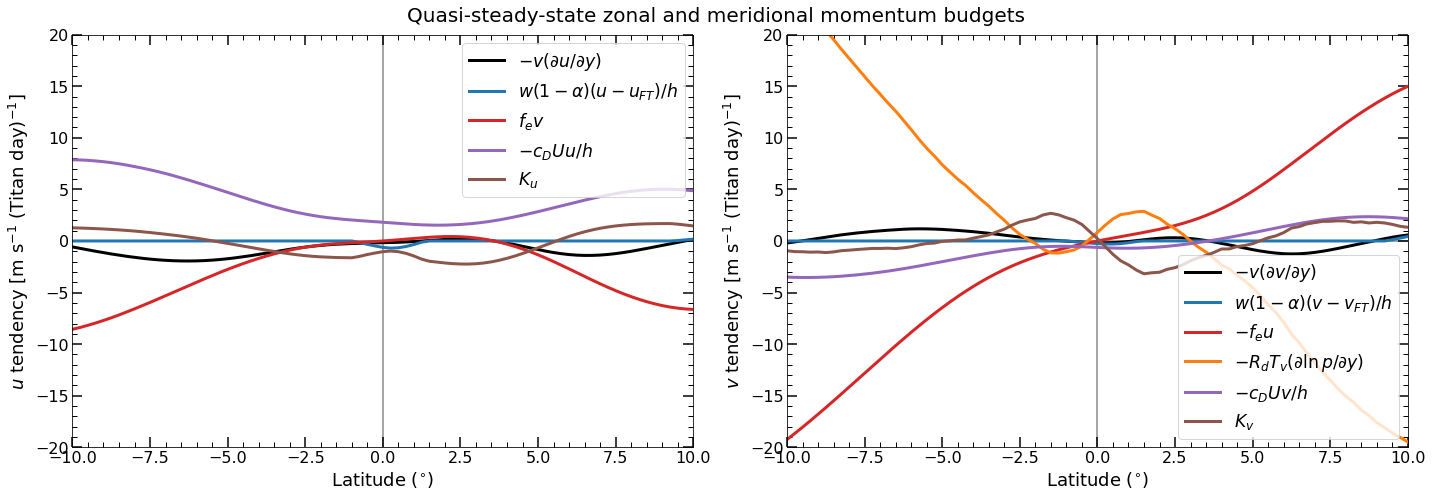

In [330]:
#plt.rcParams['text.usetex'] = True
npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(20, 13), tight_layout='true')
fig.suptitle('Quasi-steady-state zonal and meridional momentum budgets', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(2,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_xlabel('Latitude ($^{\circ}$)', fontsize=18)
   plt.xlim(-10,10)
   plt.ylim(-20,20)
   if jj == 0: 
      ax1.set_ylabel('$u$ tendency [m s$^{-1}$ (Titan day)$^{-1}$]', fontsize=18)
      lns1 = ax1.plot(lat_sblm,vdudy[nt-1,mon,:]*86400, linewidth='3', color = 'k', label = u_budget_terms[0])
      lns2 = ax1.plot(lat_sblm,u_ft_ex[nt-1,mon,:]*86400, linewidth='3', color = 'tab:blue', label = u_budget_terms[1])
      lns3 = ax1.plot(lat_sblm,uCor[nt-1,mon,:]*86400, linewidth='3', color = 'tab:red',label = u_budget_terms[2])
      #lns4 = ax1.plot(lat_sblm,-data['pgf']*86400, linewidth='3', color = 'tab:orange', label = 'gcm')
      lns5 = ax1.plot(lat_sblm,udrag[nt-1,mon,:]*86400, linewidth='3', color = 'tab:purple',label = u_budget_terms[3])
      lns6 = ax1.plot(lat_sblm,udiff[nt-1,mon,:]*86400, linewidth='3', color = 'tab:brown', label = u_budget_terms[4])
      ax1.legend(loc=locu, fontsize='xx-large')
   if jj == 1: 
      ax1.set_ylabel('$v$ tendency [m s$^{-1}$ (Titan day)$^{-1}$]', fontsize=18)
      lns1 = ax1.plot(lat_sblm,vdvdy[nt-1,mon,:]*86400, linewidth='3', color = 'k', label = v_budget_terms[0])
      lns2 = ax1.plot(lat_sblm,v_ft_ex[nt-1,mon,:]*86400, linewidth='3', color = 'tab:blue', label = v_budget_terms[1])
      lns3 = ax1.plot(lat_sblm,vCor[nt-1,mon,:]*86400, linewidth='3', color = 'tab:red', label = v_budget_terms[2])
      lns4 = ax1.plot(lat_sblm,-data['pgf'][mon,:]*86400, linewidth='3', color = 'tab:orange', label = v_budget_terms[3])
      lns5 = ax1.plot(lat_sblm,vdrag[nt-1,mon,:]*86400, linewidth='3', color = 'tab:purple', label = v_budget_terms[4])
      lns6 = ax1.plot(lat_sblm,vdiff[nt-1,mon,:]*86400, linewidth='3', color = 'tab:brown', label = v_budget_terms[5])
      ax1.legend(loc=locv, fontsize='xx-large')
   #if jj == 3: 
      # add these two lines
      #lns = lns1+lns2+lns3
      #labs = [l.get_label() for l in lns]
      #ax1.legend(lns, labs, loc=4,fontsize=14)
                    
   plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
#plt.savefig(figfolder+"sblm_uvwrvo_curves_ekm.pdf", dpi=150)

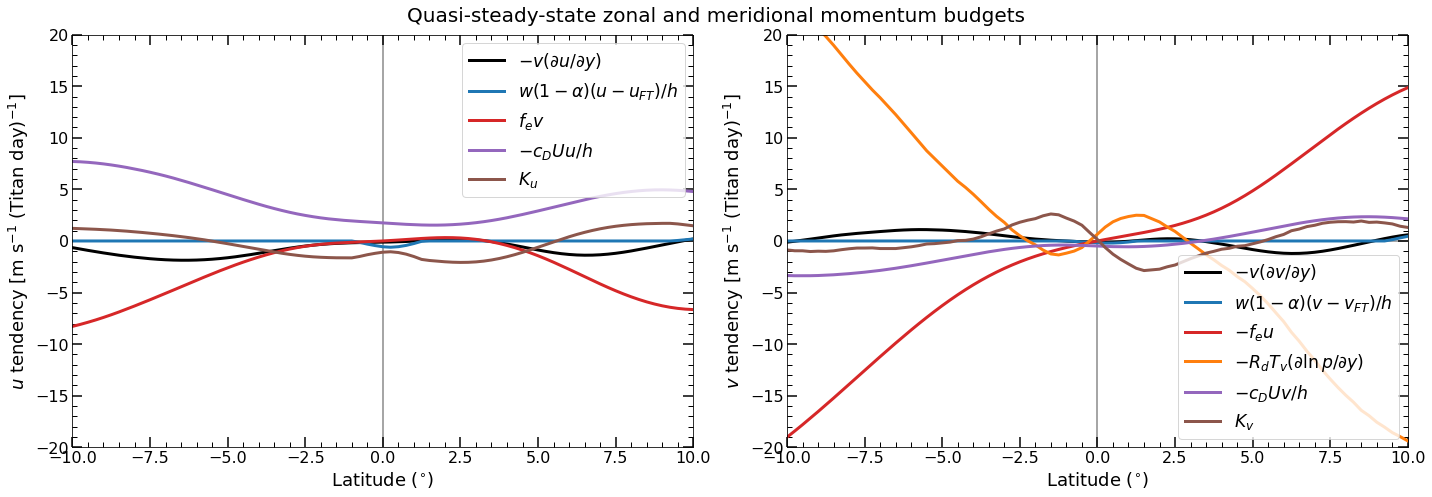

In [32]:
u_budget_terms = np.array([r'$-v\frac{\partial u}{\partial y}$',r'$\frac{w^-}{h}(u-u_{FT})$',r'$f_ev$',r'$-c_DU\frac{u}{h}$',r'$K_u$'])
v_budget_terms = np.array([r'$-v\frac{\partial v}{\partial y}$',r'$\frac{w^-}{h}(v-v_{FT})$',r'$-f_eu$',r'$- R_dT_v \,\frac{\partial \ln p}{\partial y}$',r'$-c_DU\frac{v}{h}$',r'$K_v$'])

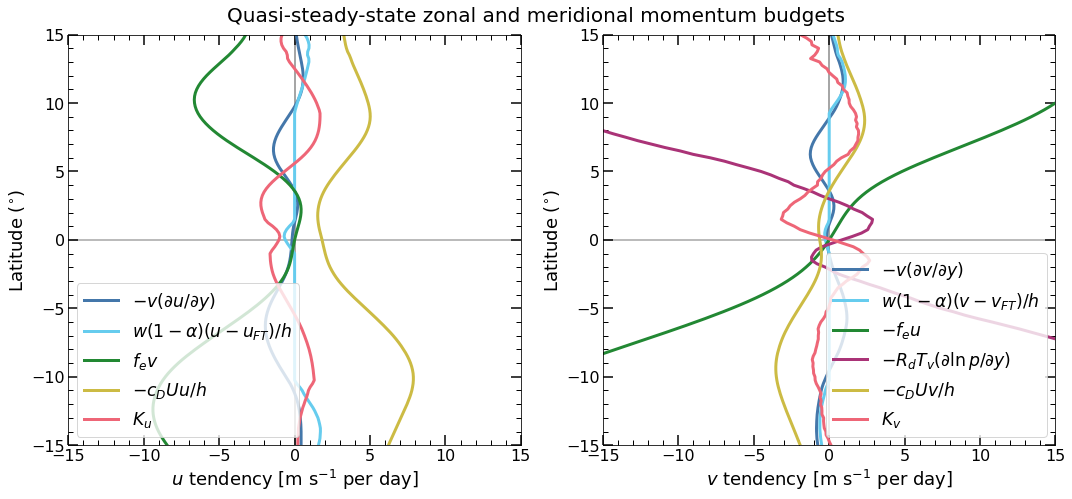

In [331]:
#plt.rcParams['text.usetex'] = True

locu = 3
locv = 4

mon = 2
npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 13), tight_layout='true')
fig.suptitle('Quasi-steady-state zonal and meridional momentum budgets', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(2,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_ylabel('Latitude ($^{\circ}$)', fontsize=18)
   plt.ylim(-15,15)
   plt.xlim(-15,15)
   if jj == 0: 
      ax1.set_xlabel('$u$ tendency [m s$^{-1}$ per day]', fontsize=18)
      lns1 = ax1.plot(vdudy[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#4477AA', label = u_budget_terms[0])
      lns2 = ax1.plot(u_ft_ex[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#66CCEE', label = u_budget_terms[1])
      lns3 = ax1.plot(uCor[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#228833',label = u_budget_terms[2])
      #lns4 = ax1.plot(lat_sblm,-data['pgf']*86400, linewidth='3', color = 'tab:orange', label = 'gcm')
      lns5 = ax1.plot(udrag[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#CCBB44',label = u_budget_terms[3])
      lns6 = ax1.plot(udiff[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#EE6677', label = u_budget_terms[4])
      ax1.legend(loc=locu, fontsize='xx-large')
   if jj == 1: 
      ax1.set_xlabel('$v$ tendency [m s$^{-1}$ per day]', fontsize=18)
      lns1 = ax1.plot(vdvdy[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#4477AA', label = v_budget_terms[0])
      lns2 = ax1.plot(v_ft_ex[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#66CCEE', label = v_budget_terms[1])
      lns3 = ax1.plot(vCor[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#228833', label = v_budget_terms[2])
      lns4 = ax1.plot(-data['pgf'][mon,:]*86400, lat_sblm, linewidth='3', color = '#AA3377', label = v_budget_terms[3])
      lns5 = ax1.plot(vdrag[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#CCBB44', label = v_budget_terms[4])
      lns6 = ax1.plot(vdiff[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#EE6677', label = v_budget_terms[5])
      ax1.legend(loc=locv, fontsize='xx-large')
   #if jj == 3: 
      # add these two lines
      #lns = lns1+lns2+lns3
      #labs = [l.get_label() for l in lns]
      #ax1.legend(lns, labs, loc=4,fontsize=14)
                    
   plt.axhline(0, color='#BBBBBB', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
#plt.savefig(figfolder+"sblm_uvwrvo_curves_ekm.pdf", dpi=150)

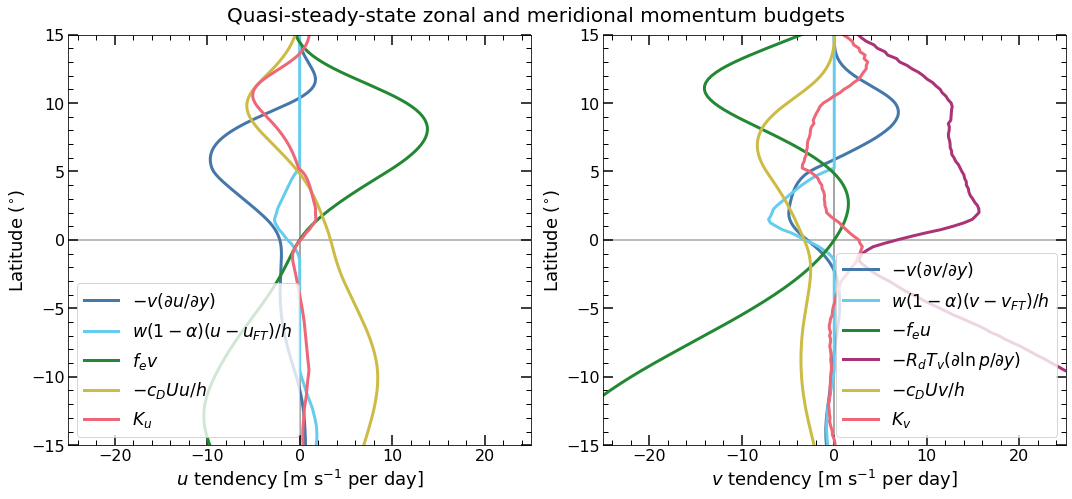

In [332]:
mon = 8
#plt.rcParams['text.usetex'] = True

locu = 3
locv = 4

npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 13), tight_layout='true')
fig.suptitle('Quasi-steady-state zonal and meridional momentum budgets', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(2,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_ylabel('Latitude ($^{\circ}$)', fontsize=18)
   plt.ylim(-15,15)
   plt.xlim(-25,25)
   if jj == 0: 
      ax1.set_xlabel('$u$ tendency [m s$^{-1}$ per day]', fontsize=18)
      lns1 = ax1.plot(vdudy[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#4477AA', label = u_budget_terms[0])
      lns2 = ax1.plot(u_ft_ex[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#66CCEE', label = u_budget_terms[1])
      lns3 = ax1.plot(uCor[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#228833',label = u_budget_terms[2])
      #lns4 = ax1.plot(lat_sblm,-data['pgf']*86400, linewidth='3', color = 'tab:orange', label = 'gcm')
      lns5 = ax1.plot(udrag[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#CCBB44',label = u_budget_terms[3])
      lns6 = ax1.plot(udiff[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#EE6677', label = u_budget_terms[4])
      ax1.legend(loc=locu, fontsize='xx-large')
   if jj == 1: 
      ax1.set_xlabel('$v$ tendency [m s$^{-1}$ per day]', fontsize=18)
      lns1 = ax1.plot(vdvdy[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#4477AA', label = v_budget_terms[0])
      lns2 = ax1.plot(v_ft_ex[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#66CCEE', label = v_budget_terms[1])
      lns3 = ax1.plot(vCor[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#228833', label = v_budget_terms[2])
      lns4 = ax1.plot(-data['pgf'][mon,:]*86400, lat_sblm, linewidth='3', color = '#AA3377', label = v_budget_terms[3])
      lns5 = ax1.plot(vdrag[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#CCBB44', label = v_budget_terms[4])
      lns6 = ax1.plot(vdiff[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#EE6677', label = v_budget_terms[5])
      ax1.legend(loc=locv, fontsize='xx-large')
   #if jj == 3: 
      # add these two lines
      #lns = lns1+lns2+lns3
      #labs = [l.get_label() for l in lns]
      #ax1.legend(lns, labs, loc=4,fontsize=14)
                    
   plt.axhline(0, color='#BBBBBB', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
#plt.savefig(figfolder+"sblm_uvwrvo_curves_ekm.pdf", dpi=150)

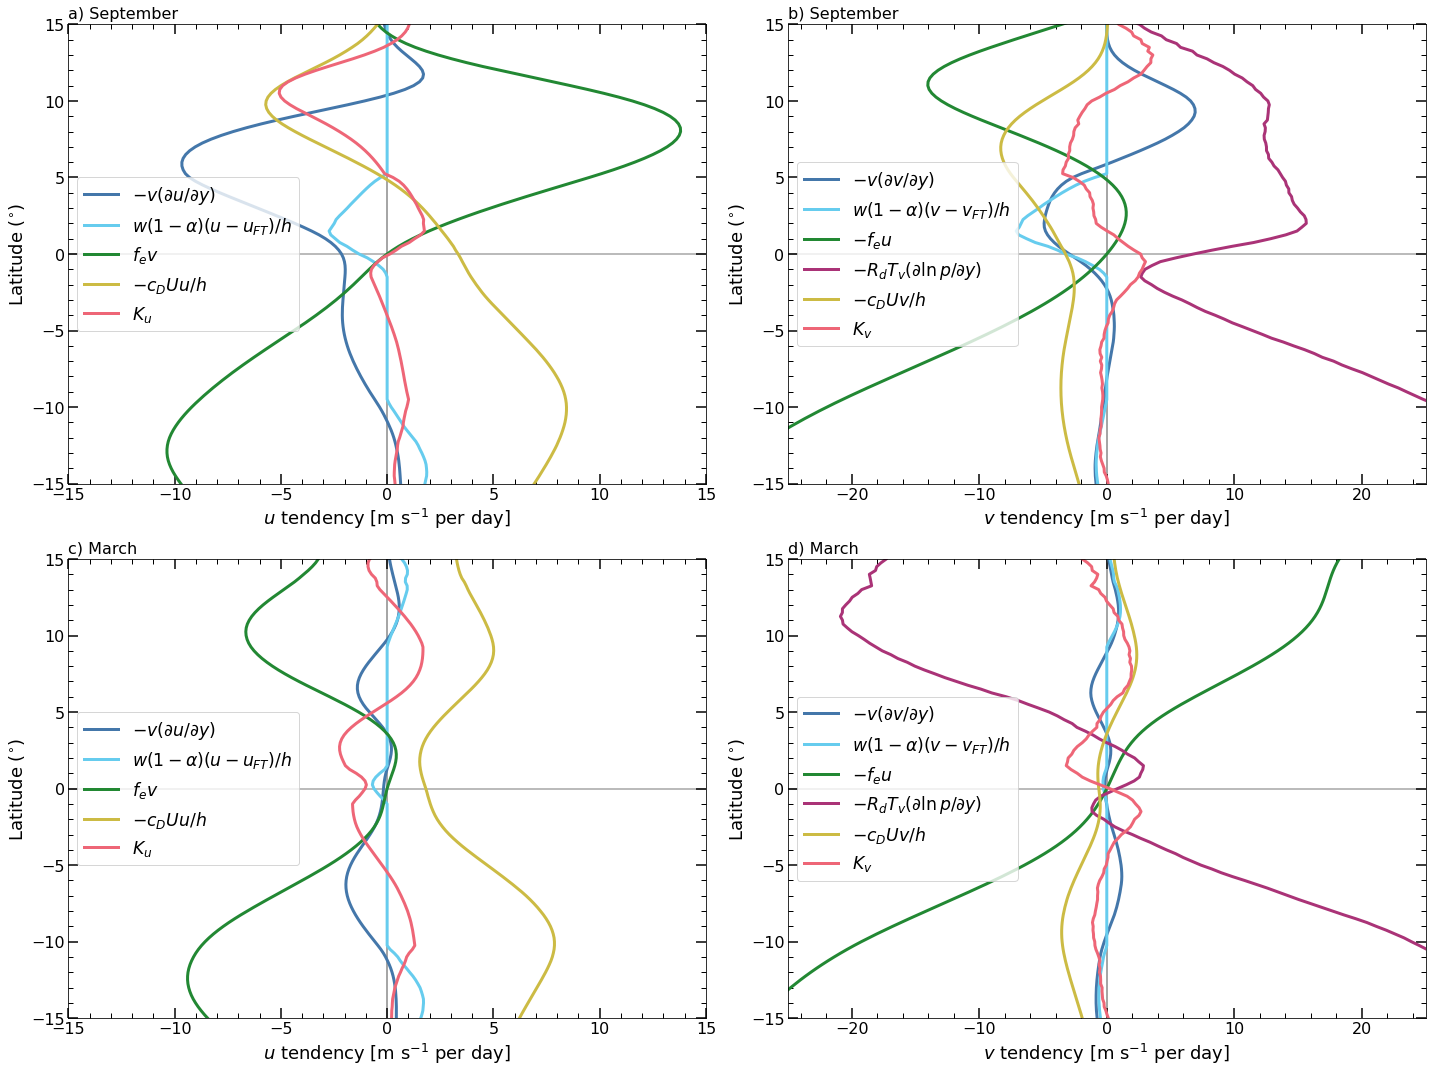

In [338]:
#plt.rcParams['text.usetex'] = True

locu = 6
locv = 6

npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(20, 15), tight_layout='true')
#fig.suptitle('Quasi-steady-state zonal and meridional momentum budgets', fontsize=20)
for jj in range(0,npan,1):
   ax1 = fig.add_subplot(2,2,jj+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', top='True')
  
   ax1.tick_params(axis='x', labelsize=16)
   ax1.tick_params(axis='y', labelsize=16)
   #plt.axhline(0, color='0.65', linewidth = 2.0, zorder=-1)
   plt.axvline(0, color='0.65', linewidth = 2.0, zorder=-1)
   ax1.set_ylabel('Latitude ($^{\circ}$)', fontsize=18)
   plt.ylim(-15,15)
   if jj == 0: 
      mon = 8
      plt.title('a) September',loc='left', fontsize=16)
      ax1.set_xlabel('$u$ tendency [m s$^{-1}$ per day]', fontsize=18)
      lns1 = ax1.plot(vdudy[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#4477AA', label = u_budget_terms[0])
      lns2 = ax1.plot(u_ft_ex[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#66CCEE', label = u_budget_terms[1])
      lns3 = ax1.plot(uCor[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#228833',label = u_budget_terms[2])
      #lns4 = ax1.plot(lat_sblm,-data['pgf']*86400, linewidth='3', color = 'tab:orange', label = 'gcm')
      lns5 = ax1.plot(udrag[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#CCBB44',label = u_budget_terms[3])
      lns6 = ax1.plot(udiff[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#EE6677', label = u_budget_terms[4])
      ax1.legend(loc=locu, fontsize='xx-large')
      plt.xlim(-15,15)
   if jj == 1: 
      mon = 8
      plt.title('b) September',loc='left', fontsize=16)
      ax1.set_xlabel('$v$ tendency [m s$^{-1}$ per day]', fontsize=18)
      lns1 = ax1.plot(vdvdy[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#4477AA', label = v_budget_terms[0])
      lns2 = ax1.plot(v_ft_ex[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#66CCEE', label = v_budget_terms[1])
      lns3 = ax1.plot(vCor[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#228833', label = v_budget_terms[2])
      lns4 = ax1.plot(-data['pgf'][mon,:]*86400, lat_sblm, linewidth='3', color = '#AA3377', label = v_budget_terms[3])
      lns5 = ax1.plot(vdrag[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#CCBB44', label = v_budget_terms[4])
      lns6 = ax1.plot(vdiff[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#EE6677', label = v_budget_terms[5])
      ax1.legend(loc=locv, fontsize='xx-large')
      plt.xlim(-25,25) 
   if jj == 2: 
      mon = 2
      plt.title('c) March',loc='left', fontsize=16)
      ax1.set_xlabel('$u$ tendency [m s$^{-1}$ per day]', fontsize=18)
      lns1 = ax1.plot(vdudy[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#4477AA', label = u_budget_terms[0])
      lns2 = ax1.plot(u_ft_ex[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#66CCEE', label = u_budget_terms[1])
      lns3 = ax1.plot(uCor[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#228833',label = u_budget_terms[2])
      #lns4 = ax1.plot(lat_sblm,-data['pgf']*86400, linewidth='3', color = 'tab:orange', label = 'gcm')
      lns5 = ax1.plot(udrag[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#CCBB44',label = u_budget_terms[3])
      lns6 = ax1.plot(udiff[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#EE6677', label = u_budget_terms[4])
      ax1.legend(loc=locu, fontsize='xx-large')
      plt.xlim(-15,15)
   if jj == 3: 
      mon = 2
      plt.title('d) March',loc='left', fontsize=16)
      ax1.set_xlabel('$v$ tendency [m s$^{-1}$ per day]', fontsize=18)
      lns1 = ax1.plot(vdvdy[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#4477AA', label = v_budget_terms[0])
      lns2 = ax1.plot(v_ft_ex[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#66CCEE', label = v_budget_terms[1])
      lns3 = ax1.plot(vCor[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#228833', label = v_budget_terms[2])
      lns4 = ax1.plot(-data['pgf'][mon,:]*86400, lat_sblm, linewidth='3', color = '#AA3377', label = v_budget_terms[3])
      lns5 = ax1.plot(vdrag[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#CCBB44', label = v_budget_terms[4])
      lns6 = ax1.plot(vdiff[nt-1,mon,:]*86400, lat_sblm, linewidth='3', color = '#EE6677', label = v_budget_terms[5])
      ax1.legend(loc=locv, fontsize='xx-large')
      plt.xlim(-25,25)
                    
   plt.axhline(0, color='#BBBBBB', linewidth = 2.0, zorder=-1)
   ax1.tick_params(axis='y', labelsize=16)
   ax1.tick_params(axis='y', which='major', length=10, width=1.5, direction='in', labelsize=16, right='True', left='True')
   ax1.tick_params(axis='y', which='minor', length= 5, width=1.0, direction='in', labelsize=16, right='True', left='True')
        
plt.savefig(figfolder+"sblm_budget_Sep_Mar_suppl.pdf", dpi=150)